<a href="https://colab.research.google.com/github/matheusmf1/computer_vision_AI/blob/master/classificador_faces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificador de Faces

## Captura de Camera

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      // await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
# Rodar camera localmente
# import cv2
# import matplotlib.pplot as plt
# %matplotlib inline
# camera = cv2.VideoCapture(0)
# ret,frame = camera.read()
# if ret:
#   frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#   plt.imshow(frame)
#   plt.show()
# camera.release()


### sxx_yy.jpg -- xx é o nosso número e yy e a amostra
- yy -> 00 a 6 - Treino
- yy ->  07 a 09 - Teste

In [ ]:
# imagem = take_photo( 's11_00.jpg' )
imagem = take_photo( 'teste.jpg' )

<IPython.core.display.Javascript object>

In [ ]:
print(imagem)

s11_00.jpg


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path_base = '/content/drive/My Drive/Colab Notebooks/Visão Computacional/images/DataSetImagens/'
treino = 'treino/'
teste = 'teste/'

In [ ]:
# TIRA E DA UPLOAD DAS FOTOS

# limiar = 7
# meuCodigo = '11'


# for i in range(10):
#   if i < limiar:
#     imagem = take_photo(path_base+treino+'s%s_%02i.jpg' % (meuCodigo, i))
#   else:  
#     imagem = take_photo(path_base+teste+'s%s_%02i.jpg' % (meuCodigo, i))
#   print(imagem)

<IPython.core.display.Javascript object>

/content/drive/My Drive/Colab Notebooks/Visão Computacional/images/DataSetImagens/treino/s11_00.jpg


<IPython.core.display.Javascript object>

/content/drive/My Drive/Colab Notebooks/Visão Computacional/images/DataSetImagens/treino/s11_01.jpg


<IPython.core.display.Javascript object>

/content/drive/My Drive/Colab Notebooks/Visão Computacional/images/DataSetImagens/treino/s11_02.jpg


<IPython.core.display.Javascript object>

/content/drive/My Drive/Colab Notebooks/Visão Computacional/images/DataSetImagens/treino/s11_03.jpg


<IPython.core.display.Javascript object>

/content/drive/My Drive/Colab Notebooks/Visão Computacional/images/DataSetImagens/treino/s11_04.jpg


<IPython.core.display.Javascript object>

/content/drive/My Drive/Colab Notebooks/Visão Computacional/images/DataSetImagens/treino/s11_05.jpg


<IPython.core.display.Javascript object>

/content/drive/My Drive/Colab Notebooks/Visão Computacional/images/DataSetImagens/treino/s11_06.jpg


<IPython.core.display.Javascript object>

/content/drive/My Drive/Colab Notebooks/Visão Computacional/images/DataSetImagens/teste/s11_07.jpg


<IPython.core.display.Javascript object>

/content/drive/My Drive/Colab Notebooks/Visão Computacional/images/DataSetImagens/teste/s11_08.jpg


<IPython.core.display.Javascript object>

/content/drive/My Drive/Colab Notebooks/Visão Computacional/images/DataSetImagens/teste/s11_09.jpg


In [ ]:
#Nome das imagens para rodar
nome_imagens_treino = []
nome_imagens_teste = []

#Labels das imagens
labels_imagens_treino = []
labels_imagens_teste = []

from os import walk
#Imagens de treino
for (dirpath, dirnames, filenames) in walk( path_base + treino ):
  for arquivo in filenames:
    if '.jpg' or '.jpeg' in arquivo:
      nome_imagens_treino.append(arquivo)
      labels_imagens_treino.append(arquivo[1:3])

print(len(nome_imagens_treino))

#Imagens de teste
for (dirpath, dirnames, filenames) in walk(path_base+teste):
  for arquivo in filenames:
    if '.jpg' in arquivo or '.jpeg' in arquivo :
      nome_imagens_teste.append(arquivo)
      labels_imagens_teste.append(arquivo[1:3])

print(len(nome_imagens_teste))

63
27


In [ ]:
path_cascade = '/content/drive/My Drive/Colab Notebooks/Visão Computacional/classificadores/dados/classificadores/haarcascade_frontalface_default.xml'

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
classificador = cv2.CascadeClassifier( path_cascade )

(186, 186)


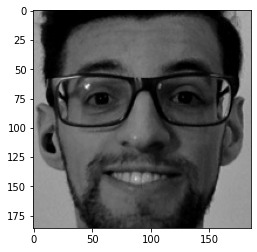

In [ ]:
# print(path_base+treino+nome_imagens_treino[40])

img = cv2.imread( path_base + treino + nome_imagens_treino[9], cv2.IMREAD_GRAYSCALE )
faces_detectadas = classificador.detectMultiScale( img, 1.3, 5 )
img_roi = None

for x,y,w,h in faces_detectadas:
  img_roi = img[y:y+h, x:x+w]
  
#Para verificar se uma imagem foi detectada
if img_roi is not None:
  print( img_roi.shape )
  plt.imshow(img_roi, cmap='gray')
  plt.show()

In [ ]:
#Labels das imagens
labels_imagens_treino = []
labels_imagens_teste = []

#Imagens tratadas
imagens_roi_treino = []
imagens_roi_teste = []

for nome_imagem in nome_imagens_treino:
  # print(path_base+treino+nome_imagem)

  img = cv2.imread(path_base+treino+nome_imagem, cv2.IMREAD_GRAYSCALE)
  faces_detectadas = classificador.detectMultiScale(img, 1.3, 5)
  img_roi = None

  for x,y,w,h in faces_detectadas:
    img_roi = img[y:y+h, x:x+w]

  #Para verificar se uma imagem foi detectada
  if img_roi is not None:
    img_roi = cv2.resize(img_roi, (200,200))
    imagens_roi_treino.append(img_roi)
    labels_imagens_treino.append(nome_imagem[1:3])

print(len(imagens_roi_treino))


for nome_imagem in nome_imagens_teste:
  # print(path_base+treino+nome_imagem)

  img = cv2.imread(path_base+teste+nome_imagem, cv2.IMREAD_GRAYSCALE)
  faces_detectadas = classificador.detectMultiScale(img, 1.3, 5)
  img_roi = None

  for x,y,w,h in faces_detectadas:
    img_roi = img[y:y+h, x:x+w]

  #Para verificar se uma imagem foi detectada
  if img_roi is not None:
    img_roi = cv2.resize(img_roi, (200,200))
    imagens_roi_teste.append(img_roi)
    labels_imagens_teste.append(nome_imagem[1:3])
    
print(len(imagens_roi_teste))


49
25


### Converter os Labels para np.int32

In [ ]:
import numpy as np

labels_imagens_teste = np.asarray( labels_imagens_teste, dtype=np.int32 )
labels_imagens_treino = np.asarray( labels_imagens_treino, dtype=np.int32 )

## Classificadores

In [ ]:
#Para verificar a acurácia do modelo gerado
from sklearn.metrics import accuracy_score

### Modelo de Eingen Faces

In [ ]:
#Carrega o modelo de Eingen Faces
modelo_eingen = cv2.face.EigenFaceRecognizer_create()

#Treinar o modelo de Eingen
modelo_eingen.train( imagens_roi_treino, labels_imagens_treino )

#Verifica o modelo
resultado = modelo_eingen.predict(imagens_roi_teste[9])
print(resultado)
print(labels_imagens_teste[9])

#Verifica a acurácia do modelo de Eingen
predicoes_eingen = []
for imagem in imagens_roi_teste:
  predicoes_eingen.append(modelo_eingen.predict(imagem)[0])

resultado_modelo_eingen = accuracy_score(labels_imagens_teste, predicoes_eingen)
print(resultado_modelo_eingen)

(12, 2295.5998826685905)
12
1.0


### Modelo FisherFaces

In [ ]:
#Carrega o modelo de FisherFaces
modelo_fisher = cv2.face.FisherFaceRecognizer_create()

#Treinar o modelo de Fisher
modelo_fisher.train(imagens_roi_treino,labels_imagens_treino)

#Verifica o modelo
resultado = modelo_fisher.predict(imagens_roi_teste[9])
print(resultado)
print(labels_imagens_teste[9])

#Verifica a acurácia do modelo de fisher
predicoes_fisher = []
for imagem in imagens_roi_teste:
  predicoes_fisher.append(modelo_fisher.predict(imagem)[0])

resultado_modelo_fisher = accuracy_score(labels_imagens_teste, predicoes_fisher)
print(resultado_modelo_fisher)

(12, 282.0622009008674)
12
1.0


### Modelo LBPH

In [ ]:
#Carrega o modelo de LBPH
modelo_LBPH = cv2.face.LBPHFaceRecognizer_create()

#Treinar o modelo de LBPH
modelo_LBPH.train(imagens_roi_treino,labels_imagens_treino)

#Verifica o modelo
resultado = modelo_LBPH.predict(imagens_roi_teste[9])
print(resultado)
print(labels_imagens_teste[9])

#Verifica a acurácia do modelo de LBPH
predicoes_LBPH = []
for imagem in imagens_roi_teste:
  predicoes_LBPH.append(modelo_LBPH.predict(imagem)[0])

resultado_modelo_LBPH = accuracy_score(labels_imagens_teste, predicoes_LBPH)
print(resultado_modelo_LBPH)

(12, 21.136304409142763)
12
1.0


### Hora de testar 

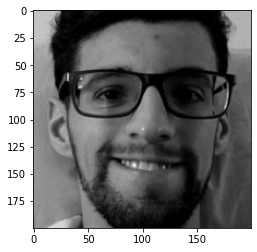

[(11, 7252.913659628123), (11, 3950.436468339277), (11, 47.059314124809454)]


In [ ]:
#Teste da verdade agora!
img = cv2.imread('teste.jpg',cv2.IMREAD_GRAYSCALE)

faces_detectadas = classificador.detectMultiScale(img, 1.3, 5)
img_roi = None

for x,y,w,h in faces_detectadas:
  img_roi = img[y:y+h, x:x+w]
  #Para verificar se uma imagem foi detectada

if img_roi is not None:
  img_roi = cv2.resize(img_roi, (200,200))
  plt.imshow(img_roi, cmap='gray')
  plt.show()
  saidas = []
  saidas.append(modelo_eingen.predict(img_roi)) 
  saidas.append(modelo_fisher.predict(img_roi)) 
  saidas.append(modelo_LBPH.predict(img_roi))
  print(saidas) 
